# Задание, оцениваемое сокурсниками:

Центральная предельная теорема своими руками
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра $normed=True$).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях $n$ (например, $5, 10, 50$) сгенерируйте $1000$ выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях $n$. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом $n$?


### Review criteria

Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;
краткие описания каждого блока кода, объясняющие, что он делает;
необходимые графики (убедитесь, что на них подписаны оси);
выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
выводы по результатам выполнения задания.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

### 1.  Гистограмма выборки обьемом 1000

Генерация выборки

В данной работе используется распределение $\chi$-квадрат.

In [2]:
k = 5
sample = sts.chi2.rvs(k, size=1000)
rv = sts.chi2(k)


Теоретическая плотность распределения

In [3]:

x = np.linspace(sts.chi2.ppf(0.01, k),sts.chi2.ppf(0.99, k),1000)
pdf = rv.pdf(x)

Рисуем гистограмму выборки и поверх нее теоретическую плотность распределения

Text(0.5, 0, '$x$')

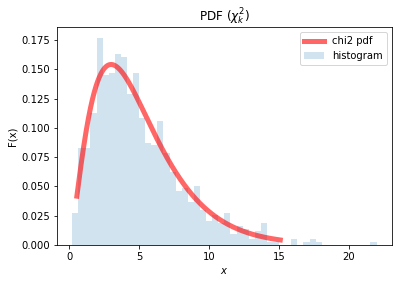

In [4]:

plt.hist(sample, density=True, histtype='stepfilled', alpha=0.2,label='histogram', bins=50)
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.legend(loc='best', frameon=False)
#plt.show()

plt.legend()
plt.title("PDF ($\chi^2_k$)")
plt.ylabel('F(x)')
plt.xlabel('$x$')

### 2. Генерация 1000 выборок распределения $\chi$-квадрат объемом $n$, построение гистограмм распределений их выборочных средних. 

#### Для распределения $\chi$ квадрат 

Математическое ожидание: $\mu = k$

Дисперсия: $\sigma^{2} = 2k$

Стандартное отклонение: $\sigma = \sqrt{2k}$

где $k$ число степеней свободы

#### Параметры нормального распределения выборки размера n, к которым будет приближаться распределение выборочных средних из распределения ХИ квадрат, согласно центральной предельной теореме.

Дисперсия: $\overline{\sigma}^{2} = \frac{2k}{n}$

Стандартное отклонение: $\overline \sigma = \sqrt{\frac{2k}{n}}$

In [13]:
def get_plot(k,n):
    mu = k
    sigma = (2*k/n)**0.5
    
    #пустой массив для результата 1000 средних
    matrix = np.empty(1000)
    
    for i in np.arange(len(matrix)):
        
        # создание выборки размеров n 
        sample = sts.chi2.rvs(k, size=n)
        chi2_rv = sts.chi2(k)
        matrix[i]= np.mean(sample)
        
    # построение гистограммы средних значений
    plt.hist(matrix, density=True, histtype='stepfilled', alpha=1.2, label='histogram' , bins=30)
        
    #построение нормального распределения, к которому, согласно ЦПД может быть приближено распределение хи квадрат
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(sts.chi2.ppf(0.01, k),sts.chi2.ppf(0.99, k),100)
    pdf = norm_rv.pdf(x)
        
    plt.plot(x, pdf, 'g-', lw=3, alpha=0.6, label = 'normal')
    plt.legend()
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.show()
    print('Размер выборки ' + str(n)+'. cтандартное отклонение '+str(sigma)+'.')
        

In [16]:
# k - число степеней свободы
def result(k):
    for i in [1,2,5,10,30,50]:
        get_plot(k,i)
    

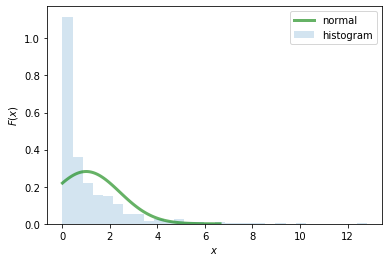

Размер выборки 1. cтандартное отклонение 1.4142135623730951.


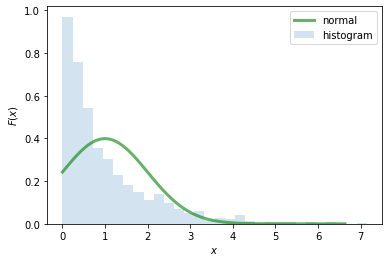

Размер выборки 2. cтандартное отклонение 1.0.


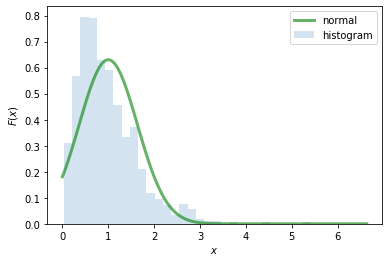

Размер выборки 5. cтандартное отклонение 0.6324555320336759.


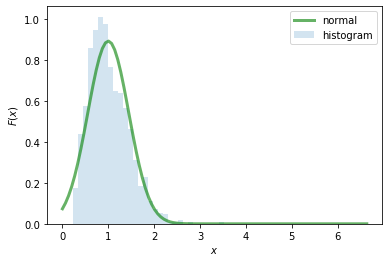

Размер выборки 10. cтандартное отклонение 0.4472135954999579.


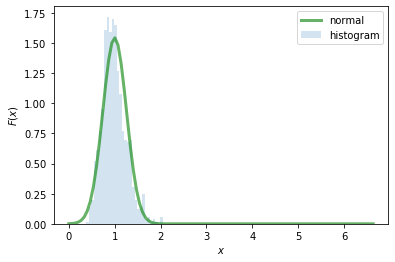

Размер выборки 30. cтандартное отклонение 0.2581988897471611.


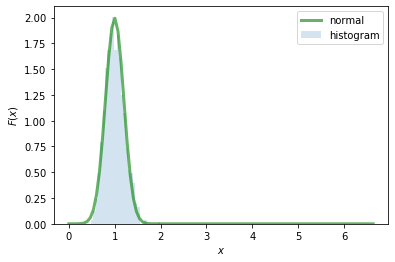

Размер выборки 50. cтандартное отклонение 0.2.


In [17]:
result(1)

### Заключение
Согласно данному результату можно сделать вывод, что чем больше обьем выборки $n$, тем больше гистограмма распределения $\chi$-квадрат становиться похожа на нормальное распределение. Данный результат является следствием центральной предельной теоремы(ЦПТ)

Центра́льные преде́льные теоре́мы (ЦПТ) — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.